In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


HR_mem (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, Statistics
#x1 = y1 = z1 = x2 = y2 = z2  = interval(-10, 10)
#z = interval(-100, 100)
#box = x1 × y1 × z1 × x2 × y2 × z2 × z
using CairoMakie
using LinearAlgebra

In [3]:
function HR_mem(u, p, t)
    function Γ(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    ρ(z, k1, k2) = k1 + k2 * z^2

    a, b, c, d, s, xr, r,  I, vs, g1, g2, k1, k2  = p
    x1, y1, z1, x2, y2, z2, z = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - g1 * ( x1 - vs ) * Γ(x2) + ρ(z, k1, k2)*(x2 - x1)
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )                                                                                                                                          
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - g2 * ( x2 - vs ) * Γ(x1) + ρ(z, k1, k2)*(x1 - x2)
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )

    du7 = x1 - x2
    
    return SVector(du1, du2, du3, du4, du5, du6, du7)
end

HR_mem (generic function with 1 method)

In [5]:
@inbounds function jacob_HR_mem(u, p, t)

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u

    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    memristor(z, k1_me, k2_me) = k1_me + k2_me * z^2

    sigmax1der = 10.0 * exp( -10.0*( x1 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x1 + 0.25 ) ) )^2
    sigmax2der = 10.0 * exp( -10.0*( x2 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x2 + 0.25 ) ) )^2
    
    x1x1 = 2.0*b*x1 - 3.0 * a * x1^2 - k1 * sigma(x2) - memristor(z, k1_me, k2_me)
    x1y1 = 1.0
    x1z1 = -1.0
    x1x2 = -k1 * ( x1 - vs ) * sigmax2der + memristor(z, k1_me, k2_me)
    x1y2 = 0.0
    x1z2 = 0.0
    x1z = k2_me * 2.0 * z * ( x2 - x1 )

    y1x1 = -2.0 * d * x1
    y1y1 = -1.0
    y1z1 = 0.0
    y1x2 = 0.0
    y1y2 = 0.0
    y1z2 = 0.0
    y1z = 0.0

    z1x1 = r * s
    z1y1 = 0.0
    z1z1 = -r
    z1x2 = 0.0
    z1y2 = 0.0
    z1z2 = 0.0
    z1z = 0.0

    zx1 = 1.0
    zy1 = 0.0
    zz1 = 0.0
    zx2 = -1.0
    zy2 = 0.0
    zz2 = 0.0

    zz = 0.0

    # -------------------------------------

    x2x2 = 2.0*b*x2 - 3.0 * a * x2^2 - k2 * sigma(x1) - memristor(z, k1_me, k2_me)
    x2y2 = 1.0
    x2z2 = -1.0
    x2x1 = -k2 * ( x2 - vs ) * sigmax1der + memristor(z, k1_me, k2_me)
    x2y1 = 0.0
    x2z1 = 0.0
    x2z = k2_me * 2.0 * z * ( x1 - x2 )

    y2x2 = -2.0 * d * x2
    y2y2 = -1.0
    y2z2 = 0.0
    y2x1 = 0.0
    y2y1 = 0.0
    y2z1 = 0.0
    y2z = 0.0

    z2x2 = r * s
    z2y2 = 0.0
    z2z2 = -r
    z2x1 = 0.0
    z2y1 = 0.0
    z2z1 = 0.0
    z2z = 0.0

    SMatrix{7,7}(x1x1, y1x1, z1x1, x2x1, y2x1, z2x1, zx1,
    x1y1, y1y1, z1y1, x2y1, y2y1, z2y1, zy1,
    x1z1, y1z1, z1z1, x2z1, y2z1, z2z1, zz1,
    x1x2, y1x2, z1x2, x2x2, y2x2, z2x2, zx2,
    x1y2, y1y2, z1y2, x2y2, y2y2, z2y2, zy2,
    x1z2, y1z2, z1z2, x2z2, y2z2, z2z2, zz2,
    x1z, y1z, z1z, x2z, y2z, z2z, zz)
end

jacob_HR_mem (generic function with 1 method)

In [73]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; vs = 2.0
g1= -0.17; g2 = -0.17
k1 = 0.01; k2 = 0.07
p = [a, b, c, d, s, xr, r, I, vs, g1, g2, k1, k2];

In [35]:
t_start = 0
t_finish = 1000
tspan = (t_start, t_finish)

(0, 1000)

In [63]:
u01 =  SA[-1.5, 0, 0, 2.5, 0.0, 0.0, 15.83]
# [1.5, 1.0, 2.0, -1.5, 0.0, 0.0, 15.83]#[-0.7590156548510231, -2.3357634289356155, 3.7581669976287393, -0.7590156548510231, -2.3357634289356155, 3.7581669976287393, 15.835581043098287]
u02 =  SA[-1.5, 0, 0, 2.5, 0.0, 0.0, 58.584]
# [1.5, 1.0, 2.0, -1.5, 0.0, 0.0, 58.584] #[-1.1913014173660204, -6.354990997836504, 3.5694446819312655, -1.1913014173660204, -6.354990997836504, 3.5694446819312655, 57.58493480354987]
u03 = SA[-1.5, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0]
u04 = SA[-1.5, 0.0, 0.0, 2.5, 0.0, 0.0, 35.0]
u05 = SA[-1.5, 0.0, 0.0, 2.5, 0.0, 0.0, 75.0]
u06 = SA[-1.5, 0.0, 0.0, 2.5, 0.0, 0.0, -15.0]
u07 = SA[-1.5, 0.0, 0.0, 2.5, 0.0, 0.0, 90.0]
u08 = SA[-1.5, 0.0, 0.0, 2.5, 0.0, 0.0, 7.5]

7-element SVector{7, Float64} with indices SOneTo(7):
 -1.5
  0.0
  0.0
  2.5
  0.0
  0.0
  7.5

In [77]:
prob1 = ODEProblem(HR_mem, sol1[end], tspan, p)
prob2 = ODEProblem(HR_mem, sol2[end], tspan, p)
prob3 = ODEProblem(HR_mem, sol3[end], tspan, p)
prob4 = ODEProblem(HR_mem, sol4[end], tspan, p)
prob5 = ODEProblem(HR_mem, sol5[end], tspan, p)
prob6 = ODEProblem(HR_mem, sol6[end], tspan, p)
prob7 = ODEProblem(HR_mem, sol7[end], tspan, p)
prob8 = ODEProblem(HR_mem, sol8[end], tspan, p)

ODEProblem with uType SVector{7, Float64} and tType Int64. In-place: false
timespan: (0, 1000)
u0: 7-element SVector{7, Float64} with indices SOneTo(7):
 -1.1990441023966973
 -5.988473147856215
  4.064191479619142
 -1.1990441023959295
 -5.988473147846925
  4.064191479614345
 -6.987348724159322

In [78]:
sol1 = solve(prob1, RK4(), adaptive = false, dt = 0.001)
sol2 = solve(prob2, RK4(), adaptive = false, dt = 0.001)
sol3 = solve(prob3, RK4(), adaptive = false, dt = 0.001)
sol4 = solve(prob4, RK4(), adaptive = false, dt = 0.001)
sol5 = solve(prob5, RK4(), adaptive = false, dt = 0.001)
sol6 = solve(prob6, RK4(), adaptive = false, dt = 0.001)
sol7 = solve(prob7, RK4(), adaptive = false, dt = 0.001)
sol8 = solve(prob8, RK4(), adaptive = false, dt = 0.001);

In [40]:
Jacobi1 = jacob_HR_mem(sol1[end], p, 0.0)

7×7 SMatrix{7, 7, Float64, 49} with indices SOneTo(7)×SOneTo(7):
 -25.9566    1.0  -1.0    17.3487    0.0   0.0   0.0
   9.66736  -1.0   0.0     0.0       0.0   0.0   0.0
   0.05      0.0  -0.01    0.0       0.0   0.0   0.0
  17.3487    0.0   0.0   -25.9566    1.0  -1.0   0.0
   0.0       0.0   0.0     9.66736  -1.0   0.0   0.0
   0.0       0.0   0.0     0.05      0.0  -0.01  0.0
   1.0       0.0   0.0    -1.0       0.0   0.0   0.0

In [44]:
det(Jacobi1)

(0.0, 0.0, -9.824650212061059e-17, 0.0)

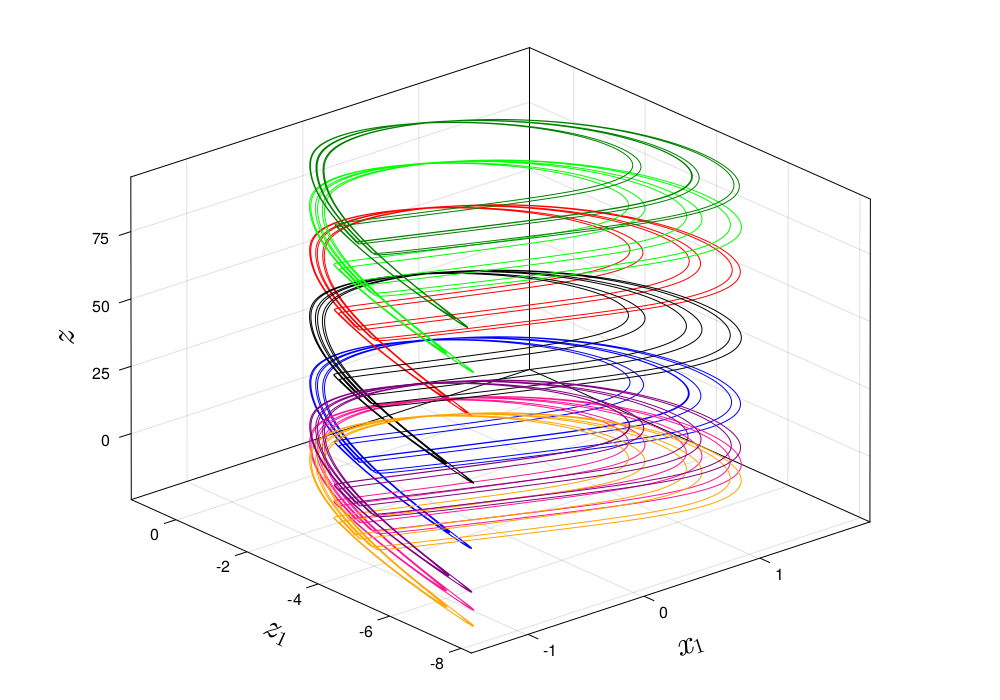

CairoMakie.Screen{IMAGE}


In [79]:
indexx, indexy, indexz = 1, 2, 7
tstart, tend = 800000, 1000000
f = Figure(resolution = (1000, 700))
axis3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"z_1", zlabel = L"z", xlabelsize = 35, ylabelsize = 35, zlabelsize = 35)

lines!(axis3d, sol1[indexx, tstart:tend], sol1[indexy, tstart:tend], sol1[indexz, tstart:tend], color = :blue, linewidth = 1.0)
lines!(axis3d, sol2[indexx, tstart:tend], sol2[indexy, tstart:tend], sol2[indexz, tstart:tend],color = :red, linewidth = 1.0)
lines!(axis3d, sol3[indexx, tstart:tend], sol3[indexy, tstart:tend], sol3[indexz, tstart:tend],color = :deeppink, linewidth = 1.0)
lines!(axis3d, sol4[indexx, tstart:tend], sol4[indexy, tstart:tend], sol4[indexz, tstart:tend],color = :black, linewidth = 1.0)
lines!(axis3d, sol5[indexx, tstart:tend], sol5[indexy, tstart:tend], sol5[indexz, tstart:tend],color = :lime, linewidth = 1.0)
lines!(axis3d, sol6[indexx, tstart:tend], sol6[indexy, tstart:tend], sol6[indexz, tstart:tend],color = :orange, linewidth = 1.0)
lines!(axis3d, sol7[indexx, tstart:tend], sol7[indexy, tstart:tend], sol7[indexz, tstart:tend],color = :green, linewidth = 1.0)
lines!(axis3d, sol8[indexx, tstart:tend], sol8[indexy, tstart:tend], sol8[indexz, tstart:tend],color = :purple, linewidth = 1.0)
display(f)

In [ ]:
indexy = 7
ts, tf = 400000, 1000000
f = Figure(resolution = (2000, 600))
axis1 = Axis(f[1, 1])
axis2 = Axis(f[2, 1])
axis3 = Axis(f[3, 1])
axis4 = Axis(f[4, 1])
axis5 = Axis(f[5, 1])
axis6 = Axis(f[6, 1])

lines!(axis1, sol1[3, ts:tf] - sol1[6, ts:tf], color = :blue)
lines!(axis2, sol2[3, ts:tf] - sol2[6, ts:tf], color = :red)
lines!(axis3, sol3[3, ts:tf] - sol3[6, ts:tf], color = :deeppink)
lines!(axis4, sol4[3, ts:tf] - sol4[6, ts:tf], color = :black)
lines!(axis5, sol5[3, ts:tf] - sol5[6, ts:tf], color = :black)
lines!(axis6, sol6[3, ts:tf] - sol6[6, ts:tf], color = :black)

display(f)

In [16]:
integ_set = (alg = RK4(), adaptive = false, dt = 0.001)
ds1 = CoupledODEs(HR_mem, sol1[end], p, diffeq = integ_set)
ds2 = CoupledODEs(HR_mem, sol2[end], p, diffeq = integ_set)
ds3 = CoupledODEs(HR_mem, sol3[end], p, diffeq = integ_set)

7-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  HR_mem
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, -0.17, 0.01, 0.07]
 time:          0.0
 state:         [-1.0244192064562028, -3.9894510300844286, 4.259903413193737, -1.024425585849613, -3.9895316415481124, 4.2598886716603, 3.0153703935085754]


In [17]:
Λs1 = lyapunovspectrum(ds1, 3000)

7-element Vector{Float64}:
   0.0008955809280159216
  -0.002417623208369774
  -0.0039342862847836805
  -0.01274880757096698
  -0.8157624853732679
  -8.866127846010425
 -Inf

In [18]:
Λs2 = lyapunovspectrum(ds2, 3000)

7-element Vector{Float64}:
   0.0009254078533987356
  -0.003282962131371542
  -0.003950099786542774
  -0.011447407625859277
  -0.9831836625989918
  -8.863578031275214
 -Inf

In [19]:
Λs3 = lyapunovspectrum(ds3, 3000)

7-element Vector{Float64}:
   0.0006728360262729424
  -0.0012787914011388383
  -0.004488001205016328
  -0.006707881476417623
  -0.028534990693281297
  -8.877708905874897
 -10.00182999323589